<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/simpleRNN%2C_LSTM_%26_Attention_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Last amended: 21st Sep, 2021
My folder: /home/ashok/Documents/8.rnn
           github/harnalashok/deeplearning-sequences/
Ref: Page
 https://www.tensorflow.org/tutorials/text/word_embeddings

Objectives:
        i)   To use SimpleRNN for Sentiment analysis
        ii)  To understand structure of Embedding layer
       iii)  To use TensorBoard to display loss-history
        iv)  To use embedding projector 
	       v) To perform tokenization, see file:
             8.rnn/3.keras_tokenizer_class.py OR file
             8.rnn/0.document_to_id_conversion.py
	         And a quick note at the end of this code.

"""

## Sentiment analysis with IMDB data

#### Call libraries

In [3]:

# 1.0 Call libraries
#%reset -f
import numpy as np
import tensorflow as tf
# 1.1 Import module imdb & other keras modules
from tensorflow.keras.datasets import imdb
#    API to manipulate sequences of words
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
#    We will have three types of layers.
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
# 1.2 Misc
import matplotlib.pyplot as plt
import time
import io


In [4]:
# 1.3 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Get data

In [5]:
# 2.1 Define some constants
max_vocabulary = 10000        # words
max_len_review = 500          # words

In [6]:
# 2.2 About imdb module
#help(imdb.load_data)

In [ ]:
# 2.3 Get imdb reviews. Limit vocabulary to size max_vocabulary
#      imdb reviews will be downloaded unless available at ~/.keras/datasets
# ************
#      See comments at the end as to how to quickly convert text to integers
# ************
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_vocabulary)

In [ ]:
# 2.4 Our downloaded data file is here:

!ls -la /root/.keras/datasets

In [ ]:
# 2.5 About our data
type(x_train)      # numpy.ndarray
print("\n")
x_train.shape      # (25000,)  Total 25000 reviews
print("\n")
x_test.shape       # (25000,)  Total 25000 reviews
print("\n")
y_train.shape      # (25000,)  Total 25000 pos/neg labels
print("\n")
y_test.shape       # (25000,)  Total 25000 pos/neg labels

In [ ]:
# 2.5.1
x_train[:2]       # Have a look at two arrays (documents)
print("\n\n------------\n\n")
y_train[:4]       # array([1, 0, 0, 1])

In [ ]:
# 2.5.2 Every comment has different number of words
len(x_train[1])     # 189
print("\n\n------------\n\n")
len(x_train[10])    # 450

In [12]:
# 2.6 Check max and min length of reviews
maxLen = 0         # Start with a low number
minLen = 200       # Start with a high number
for i in range(x_train.shape[0]):
    if maxLen < len(x_train[i]):
        maxLen = len(x_train[i])
    if minLen > len(x_train[i]):
        minLen = len(x_train[i])


In [13]:
# 2.6.1
maxLen         # 2494
print()
minLen         # 11

2494

11

In [14]:
# 2.7 We want to pad all sequences to max_len_review size.
#     Reviews more in size will be truncated and less in
#     size will be padded with zeros
# help(sequence.pad_sequences)

#### Process data

In [15]:
# 2.7.1 Pad x_train sequences

x_train = sequence.pad_sequences(
                                 x_train,   # A list of lists where each inner
                                            # list is a sequence, Or,
                                            # An array of lists with each
                                            #  list being a sequence
                                 maxlen = max_len_review,
                                 padding = 'pre'
                                 )


In [ ]:
# 2.7.2 Recheck again:

type(x_train)          # numpy.ndarray
print("\n\n------------\n\n")
x_train.shape          # (25000, 500) Each sequence becomes one row
print("\n\n------------\n\n")
len(x_train[1])     # 189
print("\n\n------------\n\n")
len(x_train[10])    # 450

#### Word Embeddings

Word embeddings give us a way to use an efficient, dense representation in which similar words have a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify). Instead of specifying the values for the embedding manually, they are trainable parameters (weights learned by the model during training, in the same way a model learns weights for a dense layer). It is common to see word embeddings that are 8-dimensional (for small datasets), up to 1024-dimensions when working with large datasets. A higher dimensional embedding can capture fine-grained relationships between words, but takes more data to learn.

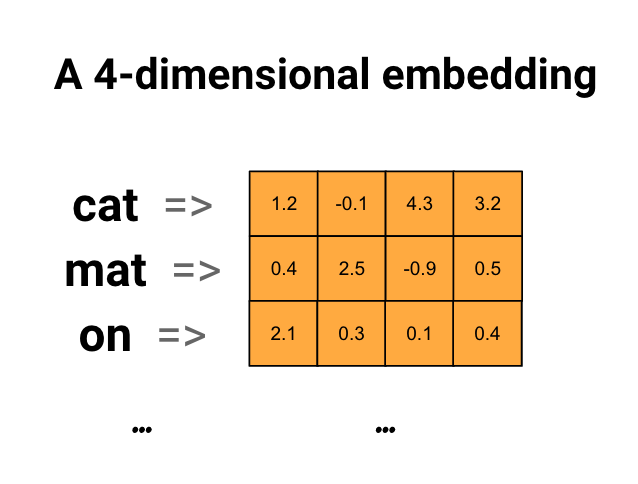

Above is a diagram for a word embedding. Each word is represented as a 4-dimensional vector of floating point values. Another way to think of an embedding is as "lookup table". After these weights have been learned, you can encode each word by looking up the dense vector it corresponds to in the table.



#### Domain importance

Learnt embeddings depend upon the domain from where the corpus of documents have been picked up. For example, in medical corpus, the word '*finished*' may be closer to the word '*death*' while in normal usage the word '*finished*' may be closer to the word '*completed*'. Similary the word '*operation*' in medical corpus will be similar to '*surgery*' while in normal usage it will be similar to '*working*' or '*running*'. Similarly, the word '*save*' in medical terminolgy may be more akin to '*life*' while in computer science, it is more similar to '*file*'.

### Model

#### Design model

In [ ]:
# 3.0 Build model now
 
# 3.0.1 Delete any earlier model 
if 'model' in locals():
  del model

# 
model = Sequential()
# 3.1 Embedding layer
model.add(Embedding(
                    max_vocabulary,            # Decides number of input neurons
                    32,                        # Decides number of neurons in hidden layer
                    input_length= max_len_review) # (optional) Decides how many times
                                                  # RNN should loop around OR how many
                                                  # RNNs would be there. See the figure
                                                  # below when maxlen is 2.
                                                  # If omitted, decided autoamtically
                                                  # during 'model.fit()' by considering
                                                  # x_train.shape[1]
                    )


In [ ]:
# 3.2
# It is instructive to see number of parameters
#  in the summary. This tells us about the Embedding
#   layer as being two layered network with no of neurons
#    as max_vocabulary and output (hidden) layer with 32 neurons
model.summary()

In [ ]:
# 3.3 Ideally we should be adding not one RNN but as many RNNs as
#     there are timesteps ie sequence length or 'max_len_review'.
#     But we add just one and perform internal looping. Note that
#     internal weights and hence LSTM parameters remain same from one
#     'timestep' to another 'timestep'. You can verify this by
#     changing the value of max_len_review and seein that number
#     of parameters in the model summary after adding the following
#     do not change.

model.add(
           SimpleRNN
                    (
                      32,                      # Neurons at the output
                      return_sequences = False # Make it True
                                               # And add layer #3.4
                    )
          )   # Output


### How Embedding layer and SimpleRNN work together
In the figure below, assume maxlen of a senetence is 2.

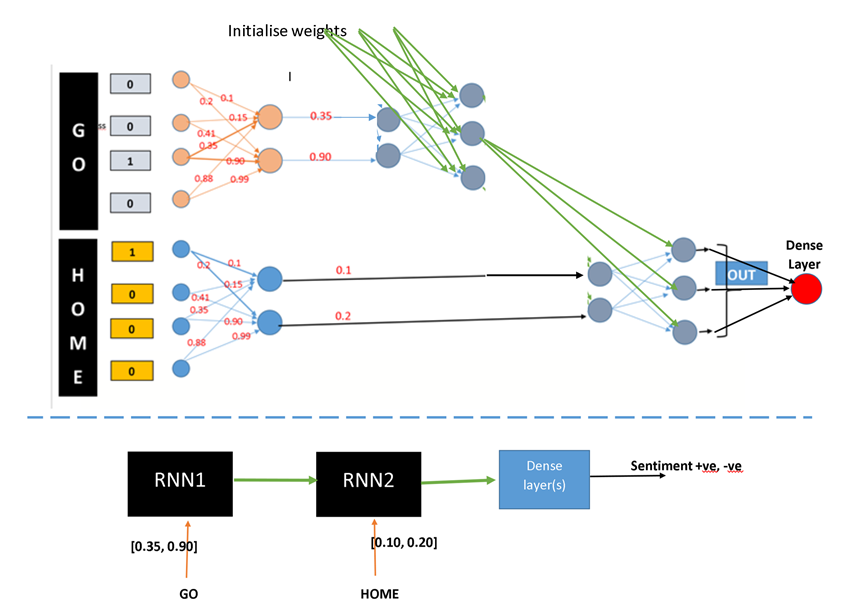

```
Sequence: GO HOME
Vocabulary: GO, TO, My, Home
Vocabulary: 4; Sequence Length = 2 ; Each word is coded as: 2 floating pt values
model.add(Embedding (4,2,2))
model.add(SimpleRNN(2)) 



```

In [ ]:
# 3.4 JUMP FOLLOWING UNLESS YOU WANT 'RNN' ABOVE 'RNN'. IT WORKS.
#     BUT TAKES TIME.
# 3.4 Make return_sequences = True in 3.3 above, before you add
#     the following layer with return_sequences = False. Else JUMP it.
#     ACCURACY IS SOMEWHAT MORE

#model.add(SimpleRNN(
#                    32,
#                    return_sequences = False   # Make return_sequences = True
#                                               # in earlier RNN for this to work
#                    )
#                    )   # Output
#

In [ ]:
"""
Why SimpleRNN adds 2080 parameters?
    input_features * output_features = 32 * 32  = 1024
    state_t * output_features        = 32 * 32  = 1024
    Bias                                            32
    Total                                         2080
This total is INDEPENDENT of sequence length or timesteps.
"""
model.summary()     # Why SimpleRNN adds 2080 parameters?
                    # input_features * output_features = 32 * 32  = 1024
                    # state_t * output_features        = 32 * 32  = 1024
                    # Bias                                            32
                    # Total                                         2080


In [ ]:
# 3.5 
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
#help(model.compile)

#### Plot model

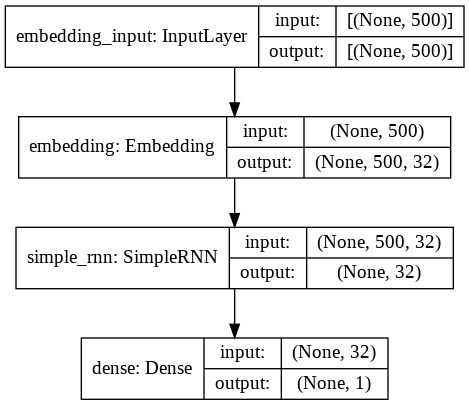

In [ ]:
# 3.5.1 Plot model
tf.keras.utils.plot_model(
                          model,
                          show_shapes=True
                          )


#### Compile model

In [ ]:
# 3.5.2 Compile model
model.compile(
               loss = 'binary_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['acc']
              )

In [ ]:
# 3.5.3 Tensorboard callback
#       We will use TensorBoard to visualize metrics 
#       including loss and accuracy. 
#       Create a tf.keras.callbacks.TensorBoard

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")


#### Train model

In [ ]:
# 4.0  Takes time 170 secs per epoch

epochs = 5             # Should be much more
start = time.time()
history = model.fit(x_train,
                    y_train,
                    batch_size = 32,             # Number of samples per gradient update
                    validation_split = 0.2,      # Fraction of training data to be used as validation data
                    epochs = epochs,
                    shuffle = True,              # Shuffle training data before each epoch
                    callbacks=[tensorboard_callback],
                    verbose =1
                    )
end = time.time()
(end-start)/60


### LSTM model
Plug and play

In [17]:
# 5.0 Build LSTM model

from tensorflow.keras.layers import LSTM

# 5.1 Create model:

model = Sequential()
model.add(Embedding(
                    max_vocabulary,            # Decides number of input neurons
                    32,                        # Decides number of neurons in hidden layer
                    input_length= max_len_review) # (optional) Decides how many times
                                                  # RNN should loop around
                                                  # If omitted, decided autoamtically
                                                  # during 'model.fit()' by considering
                                                  # x_train.shape[1]
                    )

model.add(LSTM(64, return_state = False))      # Try with return_state = True 
                                               # State means cell-state
                                               # By default the output is just 
                                               # the hidden_state and not the 
                                               # cell_state  
model.add(Dense(1, activation = 'sigmoid'))

# 5.2 Compile model:

model.compile(
               loss = 'binary_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['acc']
              )


In [ ]:
# 5.2.1 Here is how eights would be calculated.
#        See file NLP_networks_in_pictures.ipynb
#          There are a total of 4NNs with an Input and hidden layer
#            So weights for them are:  
#      ###########################################################################
#      1. Input signal from embedding layer are weighted before going to hidden layer:
#      ############################################################################
#
#        No_of_inputs * no_of_hidden_NNs = (32 * 64) *4 = 8192
#
#      ##########################################################################
#      2. Output signal from earlier LSTM is weighted and then input:
#      ###########################################################################
#
#      Input_signal_from_previous_lstm * no_of_hidden_NNs = (64 * 64) * 4 = 16384
#
#      ##########################################################################
#      3. Bias
#      ###########################################################################
#
#        Bias for each neuron in the hidden layer = 64 * 4 = 256
#
#      ##########################################################################
#      4. Total wts
#      ###########################################################################
#                                     
#                         8192 + 16384 + 256 = 24832
#

model.summary()

In [ ]:
# 5.3 Execute model:
%%time
epochs = 5
history = model.fit(x_train,
                    y_train,
                    batch_size = 32,             # Number of samples per gradient update
                    validation_split = 0.2,      # Fraction of training data to be used as validation data
                    epochs = epochs,
                    shuffle = True,              # Shuffle training data before each epoch
                    verbose =1
                    )					

### Build Attention model


In [ ]:
# 6.0 Install attention
! pip install attention

In [ ]:
# 6.1 Build LSTM model

%%time

from attention import Attention

# 6.2 Create model:

model = Sequential()
model.add(Embedding(
                    max_vocabulary,            # Decides number of input neurons
                    32,                        # Decides number of neurons in hidden layer
                    input_length= max_len_review) # (optional) Decides how many times
                                                  # RNN should loop around
                                                  # If omitted, decided autoamtically
                                                  # during 'model.fit()' by considering
                                                  # x_train.shape[1]
                    )

model.add(Attention(32))   
model.add(Dense(1, activation = 'sigmoid'))

# 6.3 Compile model:

model.compile(
               loss = 'binary_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['acc']
              )

# 6.4 Execute model:
epochs = 5
history = model.fit(x_train,
                    y_train,
                    batch_size = 32,             # Number of samples per gradient update
                    validation_split = 0.2,      # Fraction of training data to be used as validation data
                    epochs = epochs,
                    shuffle = True,              # Shuffle training data before each epoch
                    verbose =1
                    )					

### Display metrics in tensorboard

In [ ]:
# 7.4 Start tensorboard server
#     and display logs

%load_ext tensorboard
%tensorboard --logdir logs

### Display weights in Embedding Projector

Project learnt points in three dimensional space. The process is like this: weights are uploaded to *Embedding Projector*. As dimension of weights is large (32 in our case), PCA is used to reduce it to three dimensions. And then it is plotted in 3D using embedding projector. Each point is labeled by the corresponding word.  

We create file, '*vectors.tsv*', to store weights. File, '*metadata.tsv*', contains corresponding words. Both files will first be created. Then transferred to gdrive and from there to our laptop.  

In the [Embedding projector](http://projector.tensorflow.org/), we have to upload these two files (from our laptop) to display our vectors. Open embedding projector and then click on load button to upload the two files.

In [ ]:
# 7.5 Get embedding layer weights:

weights = model.get_layer('embedding').get_weights()

In [ ]:
# 7.5.1 Check:

type(weights)    # list
len(weights)     # 1

list

1

In [ ]:
# 7.5.2
# Extract array of weights
#  and print its shape
weights = weights[0]
weights
weights.shape   # (10000, 32)

In [ ]:
# 7.5.3 Get vocabulary:

type(imdb.get_word_index())   # dictionary
vocab = imdb.get_word_index()
vocab  # dict

In [ ]:
# 7.5.4 Create files to store
#     weight-vectors and metadata
#     (labels):

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')


In [ ]:
# 7.5.5 Check if files created:

! ls -la
! pwd

In [ ]:
# 7.5.6 Store data in the two files:

for word, index in vocab.items():
  if index < 10000:
    vec = weights[index]
    _=out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    _=out_m.write(word + "\n")
   

# 4.6.1

out_v.close()
out_m.close()

In [ ]:
# 7.6 Check if the two files are there:

! ls -la 

In [ ]:
# 7.6.1 
# Mount google drive:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 7.6.2 Copy files from VM
#       to gdrive

!cp /content/vectors.tsv   /content/gdrive/MyDrive/Colab_data_files
!cp /content/metadata.tsv  /content/gdrive/MyDrive/Colab_data_files

In [ ]:
# 7.6.3 Check if files copied
#       to gdrive:

! ls -la /content/gdrive/MyDrive/Colab_data_files

Next steps  

Download the two files from gdrive to your laptop. And then upload them to [Embedding Projector](http://projector.tensorflow.org/).

In [ ]:
########### I am done ######################

In [ ]:
# 8.1 Get x_test padded:

x_test = sequence.pad_sequences(
                                 x_test,   # A list of lists where each inner
                                            # list is a sequence, Or,
                                            # An array of lists with each
                                            #  list being a sequence
                                 maxlen = max_len_review,
                                 padding = 'pre'
                                 )

In [ ]:
# 8.2 Predict now:

out = model.predict(x_test)
out[out > 0.5]  = 1
out[out <= 0.5] = 0
out

In [ ]:
# 8.3

model.evaluate(x_test,y_test)

# 8.3.1

model.metrics_names        # ['loss', 'acc']


In [ ]:
############ I am done ################

### Text to integer conversion

In [ ]:
###############################################################
# Here is Quick text to integer conversion
#  For more study, please see file: 3.keras_tokenizer_class.py
###############################################################


In [ ]:
# 9.0 Call library:

from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# 9.1 Write some comments. Total nine tweets here.

texts = ["Sun shines brightly  in June! Sun is life.",
         "Star light shines on water?",
         "Water is flowing. Water shines.",
         "Flowing water, shines",
         "Sun is star?",
         "World shines",
         "Star also shines",
         "water is life",
         "Sun is energy"]

In [ ]:
# 9.2 Tokenize text:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)


In [ ]:
# 9.3 Which word has which token:

tokenizer.word_index       # Index is created based on word-frequencies
                           # Most frequent word gets the least index

In [ ]:
# 9.4 Text transformed to sequence of integers
#     We get a list of lists

tokenizer.texts_to_sequences(texts)

In [ ]:
#############################################